<a href="https://colab.research.google.com/github/Udit0104/ML/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X=6*np.random.rand(200,1)-3
y=0.8 * X**2+0.9*X+2+np.random.randn(200,1)

# y= 0.8x^2+0.9x+2

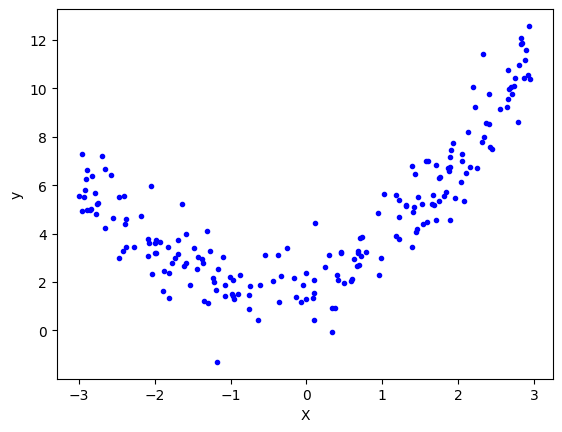

In [3]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
# Applying LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [6]:
y_pred=lr.predict(X_test)

In [7]:
r2_score(y_test,y_pred)

0.3551222196508621

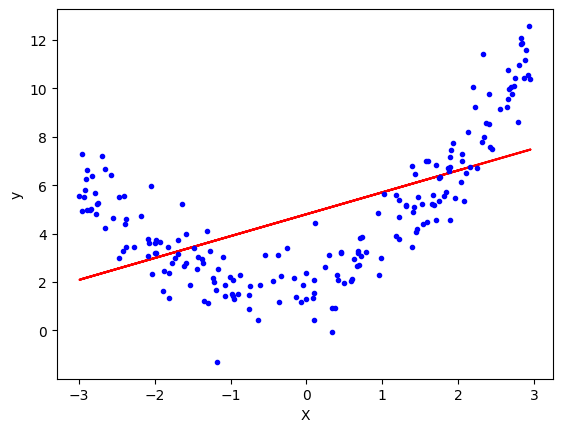

In [8]:
# Plotting Regression Line
plt.plot(X_train,lr.predict(X_train),color='red')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
# Applying Polynpmial Linear Regression
# degree 2

poly=PolynomialFeatures(degree=2)

X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [10]:
# Since degree =2 ==> we get 3 cols from 1 col
# Applied only on input cols
print(X_train[0])
print(X_train_trans[0])

[2.04967195]
[1.         2.04967195 4.20115512]


In [11]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(X_test_trans)

In [13]:
r2_score(y_test,y_pred)

0.8069999402592144

In [14]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.93437127 0.80212968]]
[1.9765059]


In [15]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)

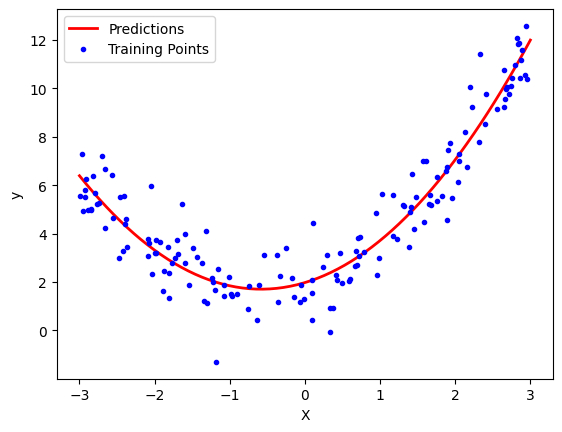

In [16]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,"b.",label='Training Points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
# function for any degree
def polynomial_regression(degree):
  X_new=np.linspace(-3,3,100).reshape(100,1)
  X_new_poly=poly.transform(X_new)

  polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()

  polynomial_regression=Pipeline([
      ("poly_features",polybig_features),
      ("std_scaler",std_scaler),
      ("lin_reg",lin_reg)
  ])

  polynomial_regression.fit(X,y)
  y_newbig=polynomial_regression.predict(X_new)
  plt.plot(X_new,y_newbig,'r',label='Degree'+str(degree),linewidth=2)

  plt.plot(X_train,y_train,"b.",linewidth=3)
  plt.plot(X_test,y_test,"g.",linewidth=3)
  plt.legend(loc="upper left")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.axis([-3,3,0,10])
  plt.show()

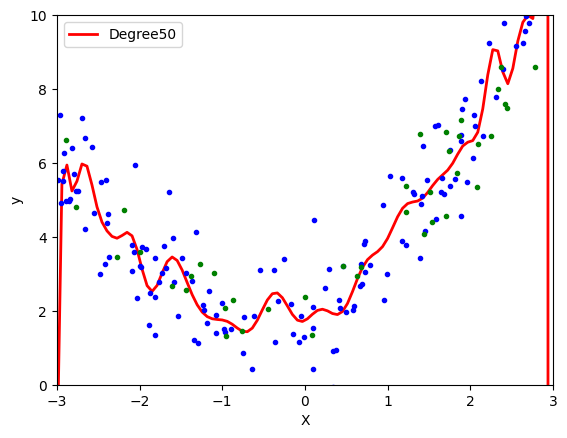

In [18]:
polynomial_regression(50)

**Multiple Polynpmial Regression**

In [19]:
# 3D polynomial regression
x= 7*np.random.rand(100,1)-2.8
y= 7*np.random.rand(100,1)-2.8

z=x**2+y**2+0.2*x+0.1*x*y+2+np.random.rand(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y +0.1xy + 2

In [20]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [21]:
# Applying Simple Linear Regression first

In [23]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(x_input,y_input)

final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [24]:
import plotly.graph_objects as go

fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()

In [25]:
X_multi=np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [26]:
poly=PolynomialFeatures(degree=2)
X_multi_trans=poly.fit_transform(X_multi)

In [29]:
print("Input",poly.n_features_in_)
print("Output",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Output 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [30]:
X_multi_trans.shape

(100, 6)

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X_multi_trans,z)

LinearRegression()

In [33]:
X_test_multi = poly.transform(final)

In [34]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [40]:
fig = px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()